In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [3]:
# Enable memory growth for the GPU
physical_devices = tf.config.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(physical_devices[-1], enable=True)

In this DataLab, you will revisit one of the MLP models you developed in the previous DataLab and dive deeper.

In [4]:
from keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

7


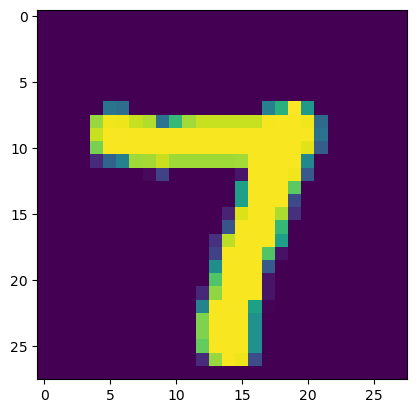

In [5]:
# random image
index = np.random.randint(0, 60000)
plt.imshow(X_train[index])
print(y_train[index])

In [6]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((60000, 28, 28), (10000, 28, 28), (60000,), (10000,))

## Task 1: Learning curves

**Task 1.1**

Adjust the shapes of X_train, X_test, y_train, y_test to be compatible with the network below.

<img src=https://i.imgur.com/OFNAslJ.png width="500">

In [7]:
X_train = X_train.reshape(60000, 784)
y_train = y_train.reshape(60000, 1)
X_test = X_test.reshape(10000, 784)
y_test = y_test.reshape(10000, 1)

**Task 1.2**

Build the model. But this time, create a function for this task because you will have to repeat it a few times today.

In [8]:
from keras.models import Sequential
from keras.layers import Dense

def build_model(print_summary=False):
    model = Sequential()

    model.add(Dense(30, input_shape=(784,), activation='relu'))
    model.add(Dense(30, activation='relu'))
    model.add(Dense(10, activation='softmax'))
    
    # display summary is optional
    if print_summary:
        model.summary()
    return model

model = build_model(print_summary=True)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 30)                23550     
_________________________________________________________________
dense_1 (Dense)              (None, 30)                930       
_________________________________________________________________
dense_2 (Dense)              (None, 10)                310       
Total params: 24,790
Trainable params: 24,790
Non-trainable params: 0
_________________________________________________________________


**Task 1.3**

Compile the model. Similarly, create a function for this task. In this DataLab we will use the Adam optimizer.

During compilation, we can define an optimizer as `model.compile(optimizer='adam', ...)`

This is a good starting point, but it does not let us configure the optimizer. Most importantly, when we want to change the learning rate. 

To achieve this, you can do the following:

`from keras.optimizers import Adam
opt = Adam(lr=0.001)
model.compile(optimizer=opt, ...)`

now this will let you change the learning rate.

Note:

If importing `Adam` gives an error try the following instead:

`from tensorflow.keras.optimizers import Adam`

In [9]:
from tensorflow.keras.optimizers import Adam
def compile_model(model, learning_rate):
    opt = Adam(learning_rate=0.001) 
    model.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

model = compile_model(model, learning_rate=0.001)

**Task 1.4**

Train the model for 5 epochs. This time save the history `H = model.fit(...)`.

In [10]:
H = model.fit(X_train, y_train, validation_split=0.2, epochs=5, batch_size=32)

Epoch 1/5
1500/1500 [==============================] - 3s 1ms/step - loss: 2.0750 - accuracy: 0.6570 - val_loss: 0.7262 - val_accuracy: 0.7746
Epoch 2/5
1500/1500 [==============================] - 2s 1ms/step - loss: 0.6005 - accuracy: 0.8262 - val_loss: 0.5436 - val_accuracy: 0.8527
Epoch 3/5
1500/1500 [==============================] - 2s 1ms/step - loss: 0.4772 - accuracy: 0.8691 - val_loss: 0.4605 - val_accuracy: 0.8876
Epoch 4/5
1500/1500 [==============================] - 2s 1ms/step - loss: 0.4325 - accuracy: 0.8840 - val_loss: 0.4405 - val_accuracy: 0.8919
Epoch 5/5
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3918 - accuracy: 0.8959 - val_loss: 0.3699 - val_accuracy: 0.9017


**Task 1.5**

Evaluate the model using `model.evaluate()`.

In [11]:
val_loss, val_acc = model.evaluate(X_test, y_test)
print(val_loss, val_acc)

313/313 [==============================] - 1s 1ms/step - loss: 0.3667 - accuracy: 0.8990
0.36667487025260925 0.8989999890327454


**Task 1.6**

Plot the learning curves for `loss` and `val_loss`. Example output:

<img src=https://i.imgur.com/74WymKX.png width="500">

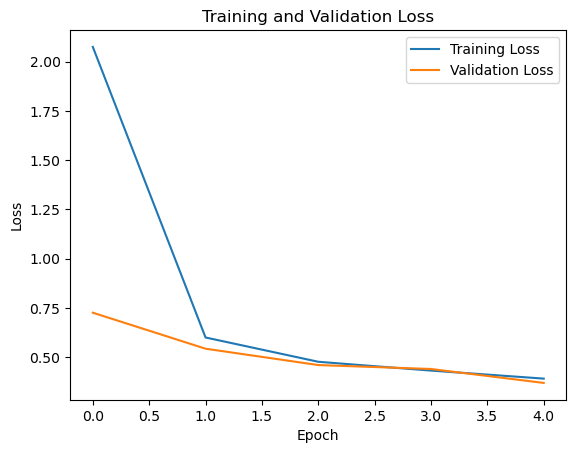

In [12]:
def loss_plotter(H):
    plt.plot(H.history['loss'], label='Training Loss')
    plt.plot(H.history['val_loss'], label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

loss_plotter(H)

**Task 1.7**

Plot the learning curves for `accuracy` and `val_accuracy`. Example output:

<img src=https://i.imgur.com/Md9JIHh.png width="500">

In [13]:
H.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

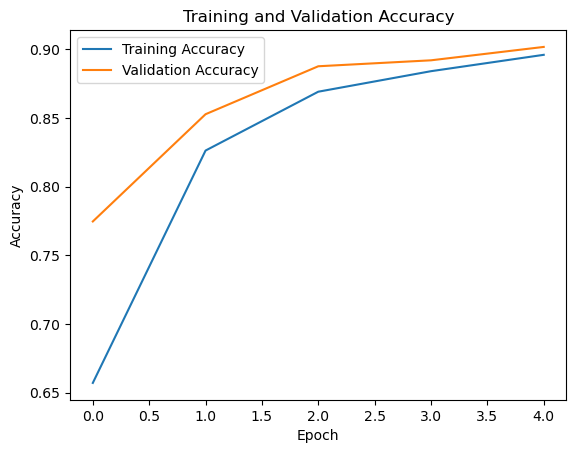

In [14]:
def accuracy_plotter(H):
    plt.plot(H.history['accuracy'], label='Training Accuracy')
    plt.plot(H.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()
    
accuracy_plotter(H)

## Task 2: EarlyStopping

In [15]:
# Use the functions you created in task 1.
model = build_model()
model = compile_model(model, learning_rate=0.001)

**Task 2.1**

Now instead of setting a fixed number of epochs, use `EarlyStopping` callback. Monitor the validation loss with a patience of 2. Remember to restore the best weights.

In [16]:
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=2)

**Note:** When using early stopping, you still need to set the number of epochs for training. Let's say you set the epochs to 10, and the model ran for 10 epochs. This means the stopping conditions you set in the callback did not occur therefore the training ran until the end. If the training runs for less than 10 epochs, this means early stopping kicked in.

**Task 2.2**

Train the model with the callback you created in Task 2.1. From now on, always store the history `H = model.fit()`. Set the number of epochs such that you can observe early stopping.

In [17]:
H = model.fit(X_train, y_train, validation_split=0.2, epochs=100, batch_size=32, callbacks=[early_stopping])

Epoch 1/100
1500/1500 [==============================] - 2s 1ms/step - loss: 1.9831 - accuracy: 0.5577 - val_loss: 0.8818 - val_accuracy: 0.7079
Epoch 2/100
1500/1500 [==============================] - 2s 1ms/step - loss: 0.7211 - accuracy: 0.7933 - val_loss: 0.5876 - val_accuracy: 0.8441
Epoch 3/100
1500/1500 [==============================] - 2s 1ms/step - loss: 0.5243 - accuracy: 0.8610 - val_loss: 0.4666 - val_accuracy: 0.8780
Epoch 4/100
1500/1500 [==============================] - 2s 1ms/step - loss: 0.4581 - accuracy: 0.8760 - val_loss: 0.4240 - val_accuracy: 0.8849
Epoch 5/100
1500/1500 [==============================] - 2s 1ms/step - loss: 0.4264 - accuracy: 0.8853 - val_loss: 0.3976 - val_accuracy: 0.8933
Epoch 6/100
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3966 - accuracy: 0.8907 - val_loss: 0.3946 - val_accuracy: 0.9031
Epoch 7/100
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3830 - accuracy: 0.8965 - val_loss: 0.3906 - val_ac

**Task 2.3**

Plot the learning curves. Interpret your results.

- Compare these to the learning curves from Task 1
- Did the model train for more than 5 epochs?
- Did the performance improve?
- Do you think the model is overfitting?

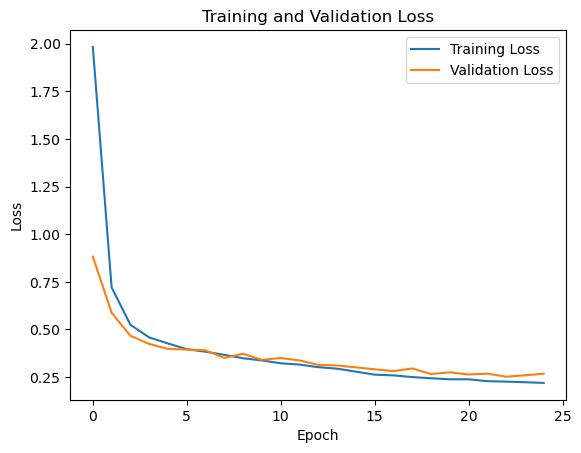

In [18]:
loss_plotter(H)

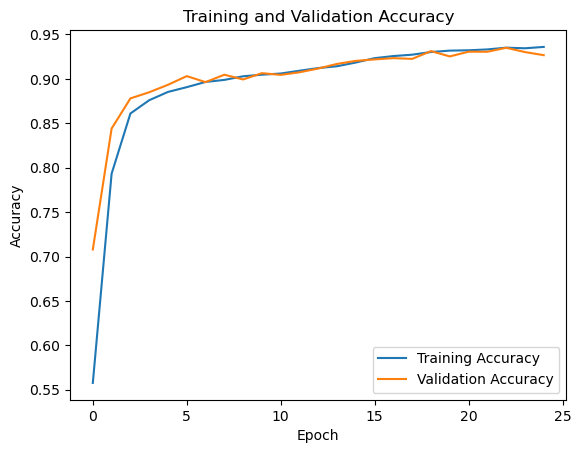

In [19]:
accuracy_plotter(H)

## Task 3: Tuning learning rate

Train your model with 5 different learning rates.

In [20]:
learning_rates = [1e-2, 1e-3, 1e-4, 1e-5, 1e-6]

Use the early stopping callback you created in Task 2. When you are training the models, save each history object. Set the number of epochs to a large enough number such that early stopping occurs in some of the learning rates.

**Task 3.1** Plot `val_loss` vs epochs for each learning rate.

Example output:

<img src=https://i.imgur.com/CPqfa3j.png width="500">

closer look:

<img src=https://i.imgur.com/BvSZA0s.png width="500">


These plots show which learning rate(s) are a good choice. But we can plot the best loss vs learning rate to see the relationship even better. 

**Task 3.2** Plot best validation loss vs learning rate.

Example output:

<img src=https://i.imgur.com/xSgQbyZ.png width="500">

Notice that we can use the validation loss obtained at the end of training (last epoch). But that is not necessarily the best. In fact, we are using early stopping for this reason: when the model is not improving, stop with a patience. If you configured the callback correctly, it returns the best model. 
- You can use `model.evaluate()` to calculate the best validation loss.
- Alternatively, since patience is 2, the 3<sup>rd</sup> validation loss from the last must be the best loss in the history.

In [21]:
histories = [] # for plotting val_loss vs epochs for each learning rate
best_val_losses = [] # for plotting best_val_loss vs learning rate

for lr in learning_rates:
    print('Training with: ', lr)
    model = build_model()
    model = compile_model(model, learning_rate=lr)
    
    H = model.fit(X_train, y_train, validation_split=0.2, epochs=100, batch_size=32, callbacks=[early_stopping])
    
    best_loss = min(H.history['val_loss'])
    
    best_val_losses.append(best_loss)
    histories.append(H)

Training with:  0.01
Epoch 1/100
1500/1500 [==============================] - 2s 1ms/step - loss: 1.9140 - accuracy: 0.6860 - val_loss: 0.6231 - val_accuracy: 0.8209
Epoch 2/100
1500/1500 [==============================] - 2s 1ms/step - loss: 0.5417 - accuracy: 0.8516 - val_loss: 0.4113 - val_accuracy: 0.8992
Epoch 3/100
1500/1500 [==============================] - 2s 1ms/step - loss: 0.4174 - accuracy: 0.8906 - val_loss: 0.3675 - val_accuracy: 0.9062
Epoch 4/100
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3695 - accuracy: 0.9030 - val_loss: 0.3856 - val_accuracy: 0.9032
Epoch 5/100
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3338 - accuracy: 0.9139 - val_loss: 0.3243 - val_accuracy: 0.9168
Epoch 6/100
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3026 - accuracy: 0.9196 - val_loss: 0.3088 - val_accuracy: 0.9214
Epoch 7/100
1500/1500 [==============================] - 2s 1ms/step - loss: 0.2763 - accuracy: 0.9263 - val_

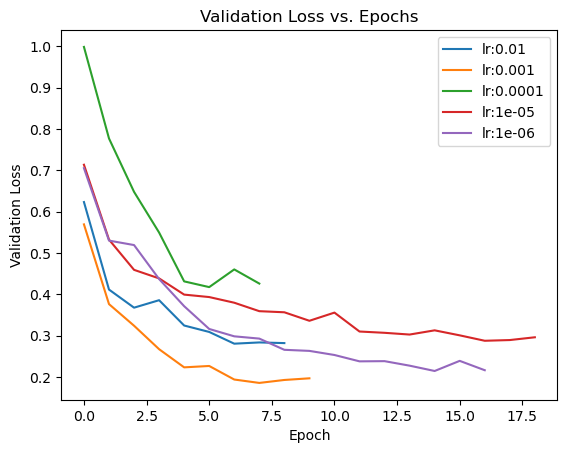

In [22]:
# TASK 3.1 #
# Plot validation loss vs. epochs for each learning rate
for i, lr in enumerate(learning_rates):
    plt.plot(histories[i].history['val_loss'], label='lr:'+str(lr))
plt.title('Validation Loss vs. Epochs')
plt.xlabel('Epoch')
plt.ylabel('Validation Loss')
plt.legend()
plt.show()

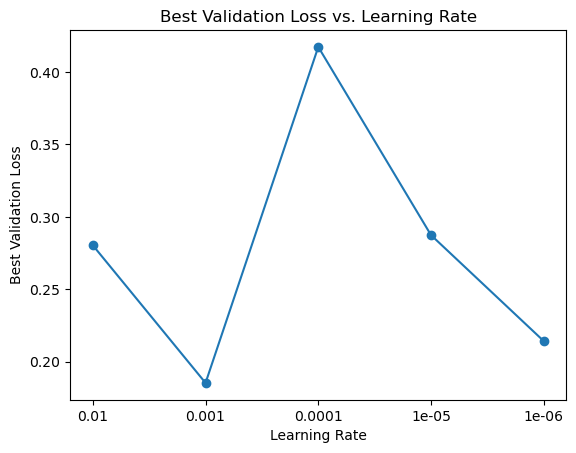

In [23]:
# TASK 3.2 #
# Plot best validation loss vs learning rate 

plt.plot(range(len(learning_rates)), best_val_losses, 'o-')
plt.xticks(range(len(learning_rates)), learning_rates)
plt.title('Best Validation Loss vs. Learning Rate')
plt.xlabel('Learning Rate')
plt.ylabel('Best Validation Loss')
plt.show()

## Task 4: Creative Brief

Apply what you have learned to your creative brief.

- Plot learning curves
- Use early stopping
- Train your model with different learning rates

In [24]:
from keras.preprocessing.image import ImageDataGenerator

train_data_dir = r'C:\Users\maxme\OneDrive\Bureaublad\wild_life_seperate_folders'

# Data generator for training set
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_generator = train_datagen.flow_from_directory(
        train_data_dir,
        target_size=(224, 224),
        batch_size=32,
        class_mode='categorical',
        color_mode='rgb',
        shuffle=True,  # shuffle the data before splitting
        subset='training', # specify that this is the training set
        )

valid_generator = train_datagen.flow_from_directory(
        train_data_dir,
        target_size=(224, 224),
        batch_size=32,
        class_mode='categorical',
        color_mode='rgb',
        shuffle=True,  # shuffle the data before splitting
        subset='validation', # specify that this is the validation set
        )

Found 1363 images belonging to 6 classes.
Found 337 images belonging to 6 classes.


In [25]:
from keras.models import Sequential
from keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam

# Define the model
def build_model_cb(print_summary=False):
    model = Sequential()

    model.add(Flatten(input_shape=(224, 224, 3))) # Flatten the input to a 1D vector
    model.add(Dense(128, activation='relu')) # Add a fully connected layer with 128 neurons and ReLU activation
    model.add(Dense(6, activation='softmax')) # Add an output layer with 6 neurons for multiclass classification and softmax activation
    return model

model = build_model_cb(print_summary=True)
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [26]:
History = model.fit(train_generator, epochs=10, steps_per_epoch=len(train_generator), validation_data = valid_generator)

Epoch 1/10
43/43 [==============================] - 5s 101ms/step - loss: 36.9897 - accuracy: 0.1959 - val_loss: 10.5312 - val_accuracy: 0.2522
Epoch 2/10
43/43 [==============================] - 4s 98ms/step - loss: 10.2789 - accuracy: 0.2546 - val_loss: 9.1318 - val_accuracy: 0.2789
Epoch 3/10
43/43 [==============================] - 4s 100ms/step - loss: 9.9666 - accuracy: 0.2898 - val_loss: 14.0842 - val_accuracy: 0.2255
Epoch 4/10
43/43 [==============================] - 4s 97ms/step - loss: 5.0295 - accuracy: 0.3419 - val_loss: 6.0771 - val_accuracy: 0.2404
Epoch 5/10
43/43 [==============================] - 4s 98ms/step - loss: 5.4276 - accuracy: 0.3742 - val_loss: 7.9925 - val_accuracy: 0.2700
Epoch 6/10
43/43 [==============================] - 4s 97ms/step - loss: 4.4755 - accuracy: 0.4021 - val_loss: 9.6503 - val_accuracy: 0.2404
Epoch 7/10
43/43 [==============================] - 4s 98ms/step - loss: 9.9362 - accuracy: 0.3155 - val_loss: 6.9342 - val_accuracy: 0.2760
Epoch 8

In [27]:
val_loss, val_acc = model.evaluate(train_generator, steps=len(train_generator))
print(f"Validation Loss: {val_loss}, Validation Accuracy: {val_acc}")

43/43 [==============================] - 3s 79ms/step - loss: 2.1148 - accuracy: 0.5671
Validation Loss: 2.114827871322632, Validation Accuracy: 0.5671313405036926


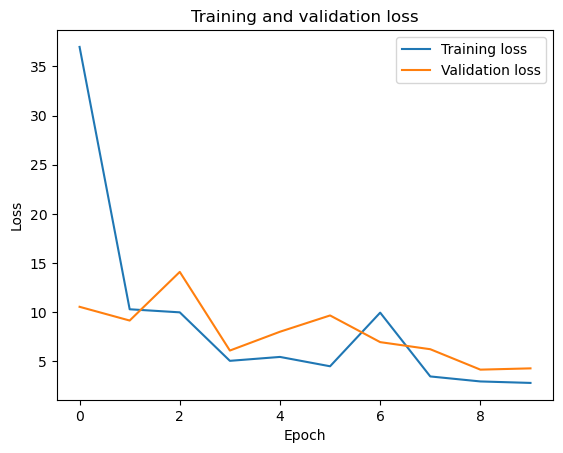

In [28]:
# Plot learning curves for loss and val_loss
def loss_plotter(History):
    plt.plot(History.history['loss'], label='Training loss')
    plt.plot(History.history['val_loss'], label='Validation loss')
    plt.title('Training and validation loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

loss_plotter(History)

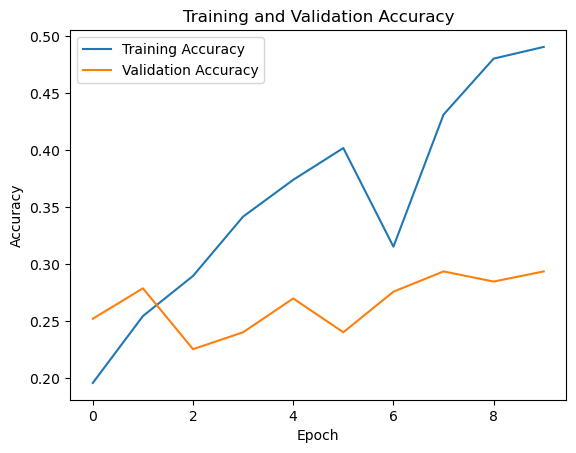

In [29]:
def accuracy_plotter(History):
    plt.plot(History.history['accuracy'], label='Training Accuracy')
    plt.plot(History.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()
    
accuracy_plotter(History)

In [30]:
model_cb = build_model_cb()
model_cb = compile_model(model_cb, learning_rate=0.001)

In [31]:
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=2)

In [32]:
History = model.fit(train_generator, 
                    epochs=100, 
                    steps_per_epoch=len(train_generator), 
                    callbacks=[early_stopping], 
                    validation_data = valid_generator)

Epoch 1/100
43/43 [==============================] - 4s 100ms/step - loss: 2.0416 - accuracy: 0.5356 - val_loss: 5.6859 - val_accuracy: 0.2136
Epoch 2/100
43/43 [==============================] - 4s 99ms/step - loss: 5.2039 - accuracy: 0.3896 - val_loss: 4.9856 - val_accuracy: 0.2641
Epoch 3/100
43/43 [==============================] - 4s 97ms/step - loss: 1.8169 - accuracy: 0.5348 - val_loss: 2.6375 - val_accuracy: 0.3412
Epoch 4/100
43/43 [==============================] - 4s 98ms/step - loss: 1.9141 - accuracy: 0.5158 - val_loss: 6.8666 - val_accuracy: 0.2136
Epoch 5/100
43/43 [==============================] - 4s 97ms/step - loss: 2.0012 - accuracy: 0.4996 - val_loss: 3.2100 - val_accuracy: 0.2819


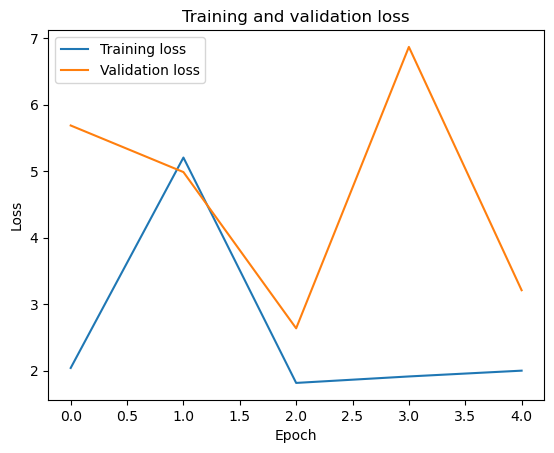

In [33]:
loss_plotter(History)

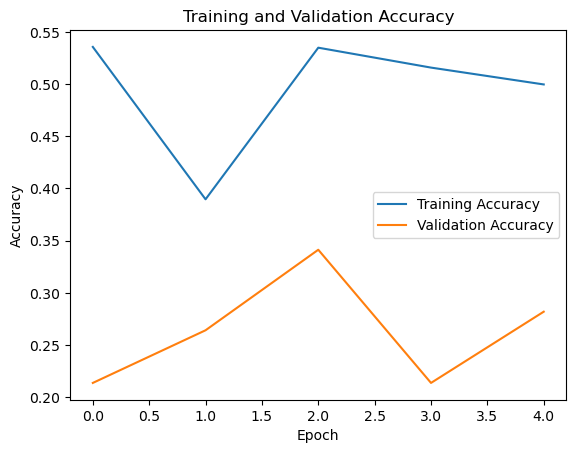

In [34]:
accuracy_plotter(History)

In [35]:
histories_cb = [] # for plotting val_loss vs epochs for each learning rate
best_val_losses_cb = [] # for plotting best_val_loss vs learning rate

for lr in learning_rates:
    print('Training with: ', lr)
    model_cb = build_model_cb()
    model_cb = compile_model(model_cb, learning_rate=lr)

    History = model.fit(train_generator,
                        epochs=100,
                        steps_per_epoch=len(train_generator),
                        callbacks=[early_stopping],
                        validation_data = valid_generator)
    
    best_loss = min(History.history['val_loss'])

    best_val_losses_cb.append(best_loss)
    histories_cb.append(History)

Training with:  0.01
Epoch 1/100
43/43 [==============================] - 4s 100ms/step - loss: 1.4084 - accuracy: 0.5510 - val_loss: 2.5604 - val_accuracy: 0.2967
Epoch 2/100
43/43 [==============================] - 4s 97ms/step - loss: 0.9642 - accuracy: 0.6354 - val_loss: 2.0539 - val_accuracy: 0.3175
Epoch 3/100
43/43 [==============================] - 4s 97ms/step - loss: 1.1770 - accuracy: 0.5994 - val_loss: 3.0683 - val_accuracy: 0.2760
Epoch 4/100
43/43 [==============================] - 4s 98ms/step - loss: 1.1838 - accuracy: 0.5957 - val_loss: 2.1858 - val_accuracy: 0.3205
Training with:  0.001
Epoch 1/100
43/43 [==============================] - 4s 97ms/step - loss: 0.7356 - accuracy: 0.7300 - val_loss: 2.6313 - val_accuracy: 0.2789
Epoch 2/100
43/43 [==============================] - 4s 97ms/step - loss: 1.3878 - accuracy: 0.5671 - val_loss: 2.8970 - val_accuracy: 0.2789
Epoch 3/100
43/43 [==============================] - 4s 96ms/step - loss: 1.4812 - accuracy: 0.5466 - va

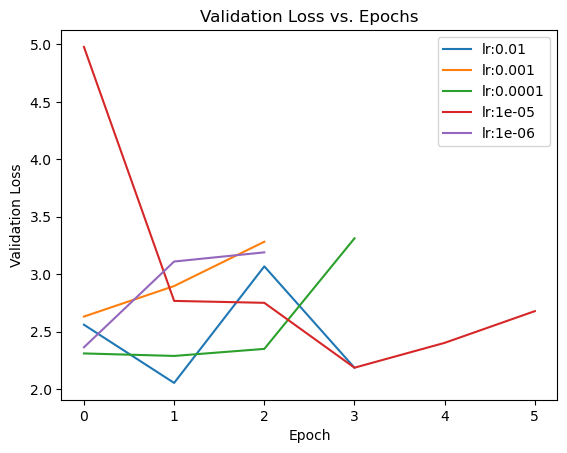

In [36]:
# plot validation loss vs. epochs for each learning rate
for i, lr in enumerate(learning_rates):
    plt.plot(histories_cb[i].history['val_loss'], label='lr:' + str(lr))
plt.title('Validation Loss vs. Epochs')
plt.xlabel('Epoch')
plt.ylabel('Validation Loss')
plt.legend()
plt.show()

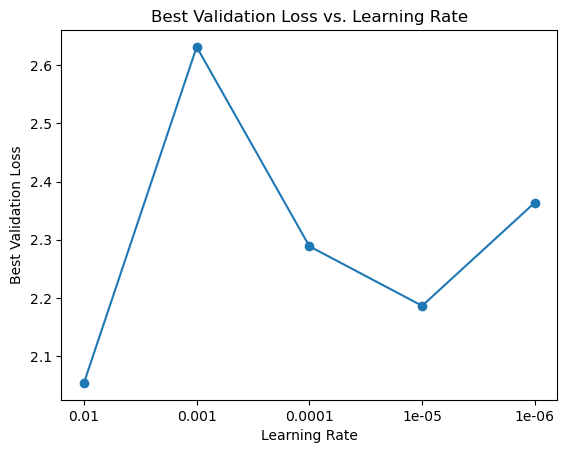

In [37]:
# Plot best validation loss vs learning rate 

plt.plot(range(len(learning_rates)), best_val_losses_cb, 'o-')
plt.xticks(range(len(learning_rates)), learning_rates)
plt.title('Best Validation Loss vs. Learning Rate')
plt.xlabel('Learning Rate')
plt.ylabel('Best Validation Loss')
plt.show()